# **<div align="center"> <ins> Social Network Analysis (Assignment)</ins> </div>**
 
# **<ins> Name</ins>: Dheeraj Chaudhary**
# **<ins> Roll</ins>: 17BCS009**

 
### Requirements/Instruction to execute this file
* Install Python (I've used Python3.7) using the command
```
sudo apt install python3.7
```
* Install Jupyter Nodebook using the command
```
pip install notebook
```
* Install Networkx package using the command
```
pip install networkx
```
* Install igraph package using the command
```
pip install python-igraph
```
**Run the cells of this notebook using Shift + Enter**


I have taken a dataset of Karate and dolphin network and applied **SEIRS** model at variying value of *time of seednode, probability, time of expose, time of recovery and time of being infectious*. I request you to please uncomment the respective line to test on the network you want. Though i have mentioned to uncomment whereevr required

### I got the following table of values (number of nodes in each state of epidemic) considering *Karate* network at a time after 10th day of Epidemic, at 0.4 probability 

| **values of [seed_input], t_i, t_e, t_r**  | **Susceptible** | **Exposed**  | **Infected** |**Recovered** |
| -------------   | -------------| -------------  | -------------|-------------|
| [2, 3], 2, 2, 2     |     6    | 11           |      5  |      12   |
| [1, 6], 1, 4, 2     |      13    | 11           |      0   |   10   |            
| [1, 3, 7], 1, 5, 6     |      18    | 9           |      2   |  5   |  
| [1, 4, 5, 6, 9], 2, 7, 1    |      20    | 7           |      7   |      0   | 

### I got the following table of values (number of nodes in each state of epidemic) considering *Dolphin* network at a time after 10th day of Epidemic, at 0.4 probability 

| **values of [seed_input], t_i, t_e, t_r**  | **Susceptible** | **Exposed**  | **Infected** |**Recovered** |
| -------------   | -------------| -------------  | -------------|-------------|
| [2, 4], 1, 2, 3     |     39    | 14           |      5  |      4   |
| [2, 5, 7], 2, 3, 1     |      34    | 17           |      7   |   4   |            
| [7, 9], 2, 4, 5    |      42    | 9           |      3   |  8   |  
| [1, 2, 3, 4, 5], 2, 3, 1   |      29    | 19           |      11   |      3   | 

###  <span style="color:purple">Infact, You can also test the code by giving manual input of all values of [seed_input], t_i, t_e, t_r along with changing the value of probability </span>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from igraph import *
import random

In [26]:
#karate network
graph_ = Graph.Read('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/epidemic/karate.gml')


#dolphin network         UNCOMMENT BELOW LINE TO TEST ON DOLPHINS NETWORK
#graph_ = Graph.Read('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/epidemic/dolphins.gml')

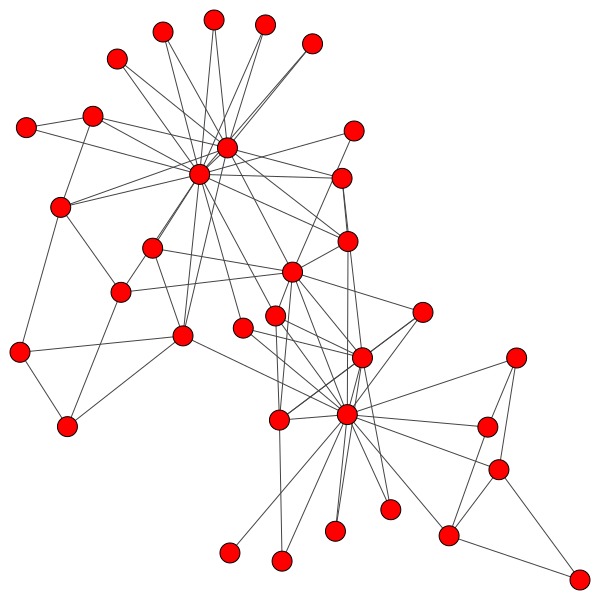

In [27]:
plot(graph_)

In [16]:
graph_.vcount()

34

In [22]:
# MAIN CODE
susceptiple_nodes = {0: {"status": "susceptible","color": "green", "timestamp": 0 } }
for i in range(1, graph_.vcount()):
    susceptiple_nodes[i] = {"status": "susceptible","color": "green", "timestamp": 0 } 
    susceptiple_nodes.update(susceptiple_nodes)

#INITIALIZE SEED NODE
# t_i = 1
# seed_node = [2,3]

t = int(input('Enter the day number on which you want to check the condition of epidemic: ')) 

seed_node = []                                    ## Create an empty list for infected seed list
n= int(input("Enter number of inital seeds(which are infected) that you want to give: "))      ## ENter the number of initial seeds that you're infecting

for i in range(0,n):
    seed_val = int(input('Enter seed value(infected seeds): '))
    seed_node.append(seed_val)                  ## Appending the seeds 
    
print(' seed input given by the user is: ', seed_node)        ## Prints the seed list



for key in seed_node:
    susceptiple_nodes[key]["status"] = "infectious"
    susceptiple_nodes[key]["color"] = "red"
    susceptiple_nodes[key]["timestamp"] = t_i
    
#INITIALIZE TIMESTAMPS AND PROBABILITY
# t_e = 1
# t_r = 1
p = 0.4
t_i = int(input('Enter the time of infection: ')) 
t_e = int(input('Enter the time of exposed: ')) 
t_r = int(input('Enter the time of recovery: ')) 
# p = input('Enter the probability of spreading in neighbors: ')
# # susceptible_nodes = list()
exposed_nodes = list()
recovered_nodes = list()

def neighbors(graph_,node):
    neighbour_nodes = graph_.neighbors(node)
    return neighbour_nodes

# INITIALIZE t for number of iterations 
# t=10
day = 0
while(t):   
    

    day = day + 1
    print("DAY"+ str(day) )
    # TRANSITION SUSCEPTIBLE TO EXPOSED
    for node in seed_node:
        for j in neighbors(graph_,node):
            prob = random.uniform(0,1)
            if prob <= p and susceptiple_nodes[j]["status"] == "susceptible" :
                susceptiple_nodes[j]["status"] = "exposed"
                susceptiple_nodes[j]["timestamp"] = t_e
                susceptiple_nodes[j]["color"] = "yellow"
    
    
    # TRANSITION INFECTIOUS TO RECOVERED
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "infectious":
            if susceptiple_nodes[i]["timestamp"] >= 0:
                susceptiple_nodes[i]["timestamp"] = susceptiple_nodes[i]["timestamp"] - 1
            else:
                seed_node.remove(i)
                susceptiple_nodes[i]["status"] = "recovered"
                susceptiple_nodes[i]["timestamp"] = t_r
                susceptiple_nodes[i]["color"] = "blue"
   
    # TRANSITION RECOVERED TO SUSCEPTIBLE
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "recovered":
            if susceptiple_nodes[i]["timestamp"] >= 0:
                susceptiple_nodes[i]["timestamp"] = susceptiple_nodes[i]["timestamp"] - 1
            else:
                susceptiple_nodes[i]["status"] = "susceptible"
                susceptiple_nodes[i]["timestamp"] = 0
                susceptiple_nodes[i]["color"] = "green"
    
    # TRANSITION EXPOSED TO INFECTIOUS
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "exposed":
            if susceptiple_nodes[i]["timestamp"] >=0:
                   susceptiple_nodes[i]["timestamp"] = susceptiple_nodes[i]["timestamp"] - 1
            else:
                susceptiple_nodes[i]["status"] = "infectious"
                susceptiple_nodes[i]["timestamp"] = 0
                susceptiple_nodes[i]["color"] = "red"
                seed_node.append(i)
    count1=0
    count2=0
    count3=0
    count4=0
    print("SUSCEPTIBLE NODES")
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "susceptible":
#             print(i)
            count1=count1+1
    print(count1)
    print("EXPOSED NODES")  
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "exposed":
#             print(i)
            count2=count2+1
    print(count2)
            
    print("INFECTED NODES")  
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "infectious":
#             print(i)
            count3=count3+1
    print(count3)
    print("RECOVERED")
    for i in range(0, graph_.vcount()):
        if susceptiple_nodes[i]["status"] == "recovered":
#             print(i)
            count4=count4+1
    print(count4)
    
    t= t-1
    print("\n")


Enter the day number on which you want to check the condition of epidemic: 10
Enter number of inital seeds(which are infected) that you want to give: 2
Enter seed value(infected seeds): 2
Enter seed value(infected seeds): 3
 seed input given by the user is:  [2, 3]
Enter the time of infection: 2
Enter the time of exposed: 2
Enter the time of recovery: 2
DAY1
SUSCEPTIBLE NODES
27
EXPOSED NODES
5
INFECTED NODES
2
RECOVERED
0


DAY2
SUSCEPTIBLE NODES
26
EXPOSED NODES
6
INFECTED NODES
2
RECOVERED
0


DAY3
SUSCEPTIBLE NODES
24
EXPOSED NODES
8
INFECTED NODES
2
RECOVERED
0


DAY4
SUSCEPTIBLE NODES
22
EXPOSED NODES
5
INFECTED NODES
5
RECOVERED
2


DAY5
SUSCEPTIBLE NODES
20
EXPOSED NODES
6
INFECTED NODES
6
RECOVERED
2


DAY6
SUSCEPTIBLE NODES
13
EXPOSED NODES
11
INFECTED NODES
3
RECOVERED
7


DAY7
SUSCEPTIBLE NODES
14
EXPOSED NODES
10
INFECTED NODES
4
RECOVERED
6


DAY8
SUSCEPTIBLE NODES
10
EXPOSED NODES
12
INFECTED NODES
4
RECOVERED
8


DAY9
SUSCEPTIBLE NODES
12
EXPOSED NODES
8
INFECTED NODES
